# **1. Introduction** 
- Name  : Sanggeni Gali Wardhana
- Batch : FTDS-011
- Dataset : Celeba-dataset
- Objective : Gender Recognition

this project was built using google colab

if you want to run this script, you can run it in google colab
___

Image recognition is a process used to detect objects in an image or digital video. The concept of image recognition is one of the tasks carried out in the field of computer vision, so in this case the computer can learn the features of an image or a set of images using a neural network algorithm (Convolutional Neural Network). In this study, I used a dataset of close-up photos of humans with predetermined gender labels, with the aim of creating a model that can identify human photos so that they can determine gender automatically.

---



# **2. Import Library** 

In [1]:
# Important Master Library
import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from IPython import display 
from PIL import Image

# For Train and Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#  Modelling for Tensor Flow Library
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten, MaxPool2D

# To ignoring Warnings
import warnings
warnings.filterwarnings('ignore')



---


# **3. Data Loading** 

## Connect to Kaggle and download the dataset

In [2]:
!mkdir -p ~/.kaggle #bikin folder di kaggle root
!cp kaggle.json ~/.kaggle # copy paster kaggle.json ke folder kaggle 

!mkdir ./kaggle #bikin folder kaggle di lokasi sama (bukan di root)
!mv ./kaggle.json ./kaggle #move atau pindahi file kaggle.json ke folder kaggle

cp: cannot stat 'kaggle.json': No such file or directory
mkdir: cannot create directory ‘./kaggle’: File exists
mv: cannot stat './kaggle.json': No such file or directory


In [3]:
!chmod 600 ~/.kaggle/kaggle.json #perizinan akses, hanya pemilik file yang memiliki akses baca dan tulis ke file
!ls ~/.kaggle #cek list data yang ada di folder kaggle

kaggle.json


In [4]:
!kaggle datasets download -d jessicali9530/celeba-dataset

celeba-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


The data is still in zip, let's unzip it.

In [5]:
!unzip -q /content/celeba-dataset.zip -d celeb_dataset

replace celeb_dataset/img_align_celeba/img_align_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## Explore and load the data to a dataframe

In [6]:
dir_name= os.listdir('/content/celeb_dataset')
dir_name

['list_bbox_celeba.csv',
 'list_landmarks_align_celeba.csv',
 'list_eval_partition.csv',
 'list_attr_celeba.csv',
 'img_align_celeba']

In [7]:
dir_folder = '/content/celeb_dataset'
img_folder = os.listdir('/content/celeb_dataset/img_align_celeba/img_align_celeba')

In [8]:
img_folder.sort()

In [9]:
img_folder

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.j

In [10]:
len(img_folder)

202599

In [11]:
img_path = '/content/celeb_dataset/img_align_celeba/img_align_celeba'

In [12]:
data = pd.read_csv('/content/celeb_dataset/list_attr_celeba.csv')
data.head(5)

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  

[5 rows x 41 columns]

In [13]:
data.keys()

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

Ok, because we just doing the gender recognition, we will use only "Male" column

In [14]:
data = data[["image_id","Male"]]
data.head(5)

image_id  Male
0  000001.jpg    -1
1  000002.jpg    -1
2  000003.jpg     1
3  000004.jpg    -1
4  000005.jpg    -1

let's check the third image compare it with the label, is it male or female?

In [15]:
data.shape

(202599, 2)

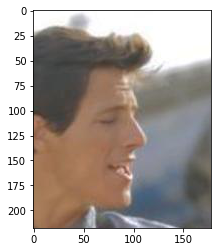

In [16]:
img_test = load_img(img_path+"/000003.jpg")
plt.imshow(img_test)

Yes, the third or 000003.jpg was male photo, so label 1 means male, and i will change female label from -1 to 0.

In [17]:
data['Male'].replace(-1, 0, inplace=True)
data['Male']

0         0
1         0
2         1
3         0
4         0
         ..
202594    0
202595    1
202596    1
202597    0
202598    0
Name: Male, Length: 202599, dtype: int64

female label was completely change to 0

In [18]:
data['Male'].replace(0, "female", inplace=True)
data['Male'].replace(1, "male", inplace=True)


before inputing to dataframe, i make glob.glob to make list of image link

In [19]:
dataset_image = glob.glob(img_path + "/*.jpg")
dataset_image.sort()

In [20]:
dataset_image[:5]

['/content/celeb_dataset/img_align_celeba/img_align_celeba/000001.jpg',
 '/content/celeb_dataset/img_align_celeba/img_align_celeba/000002.jpg',
 '/content/celeb_dataset/img_align_celeba/img_align_celeba/000003.jpg',
 '/content/celeb_dataset/img_align_celeba/img_align_celeba/000004.jpg',
 '/content/celeb_dataset/img_align_celeba/img_align_celeba/000005.jpg']

we can see above, the link was in the list. After this, we can input this data to "images" column on dataframe

In [21]:
data["images"] = dataset_image
data = data[["images", "Male"]]

In [22]:
data.head(4)

images    Male
0  /content/celeb_dataset/img_align_celeba/img_al...  female
1  /content/celeb_dataset/img_align_celeba/img_al...  female
2  /content/celeb_dataset/img_align_celeba/img_al...    male
3  /content/celeb_dataset/img_align_celeba/img_al...  female

In [23]:
data.shape

(202599, 2)

In [24]:
data.isnull().sum()

images    0
Male      0
dtype: int64

There is no missing value in this data

---


# **4. Exploratory Data Analysis (EDA)**

## Check the label data distribution

In [25]:
data.rename(columns={"Male":"label"}, inplace=True)

In [26]:
def visualize_barplot(dat,column):
  cplt =dat.groupby(column)[column].count().reset_index(name='Counts')
  sns.barplot(x=column, y='Counts',data=cplt, dodge=False)
  plt.ylabel("Frequency")
  plt.show()

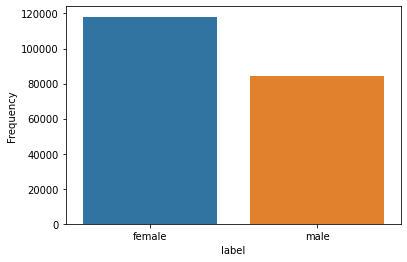

In [27]:
visualize_barplot(data,"label")

We can see here, the female gender was bigger than male, but it's still having a good distribution

In [28]:
def sample_visualization(samples):
  fig,ax= plt.subplots(nrows=3, ncols=6, figsize= (24,10))
  for i, sample in enumerate(samples):
    img= cv2.imread(sample)
    if samples==female_sample :
      ax[i//6, i%6].set_title("Female")
      ax[i//6, i%6].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else :
      ax[i//6, i%6].set_title("Male")
      ax[i//6, i%6].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [29]:
female_sample = (data[data['label']=="female"]['images'].iloc[:18]).tolist()
male_sample = (data[data['label']=="male"]['images'].iloc[:18]).tolist()

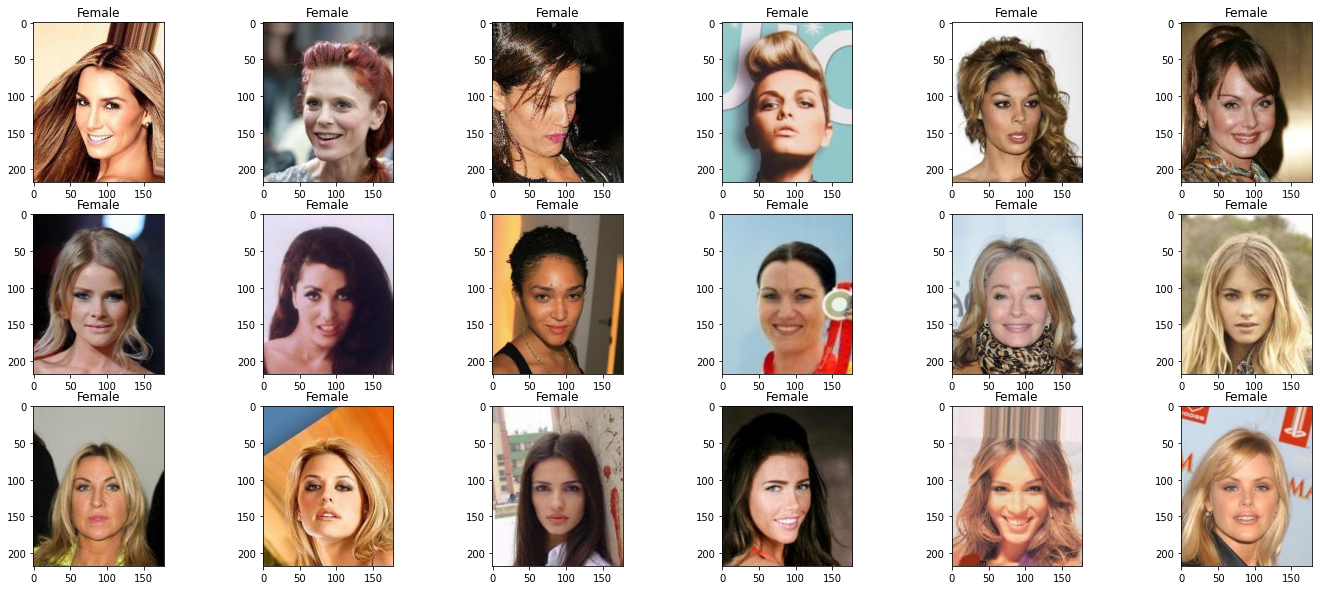

In [30]:
sample_visualization(female_sample)

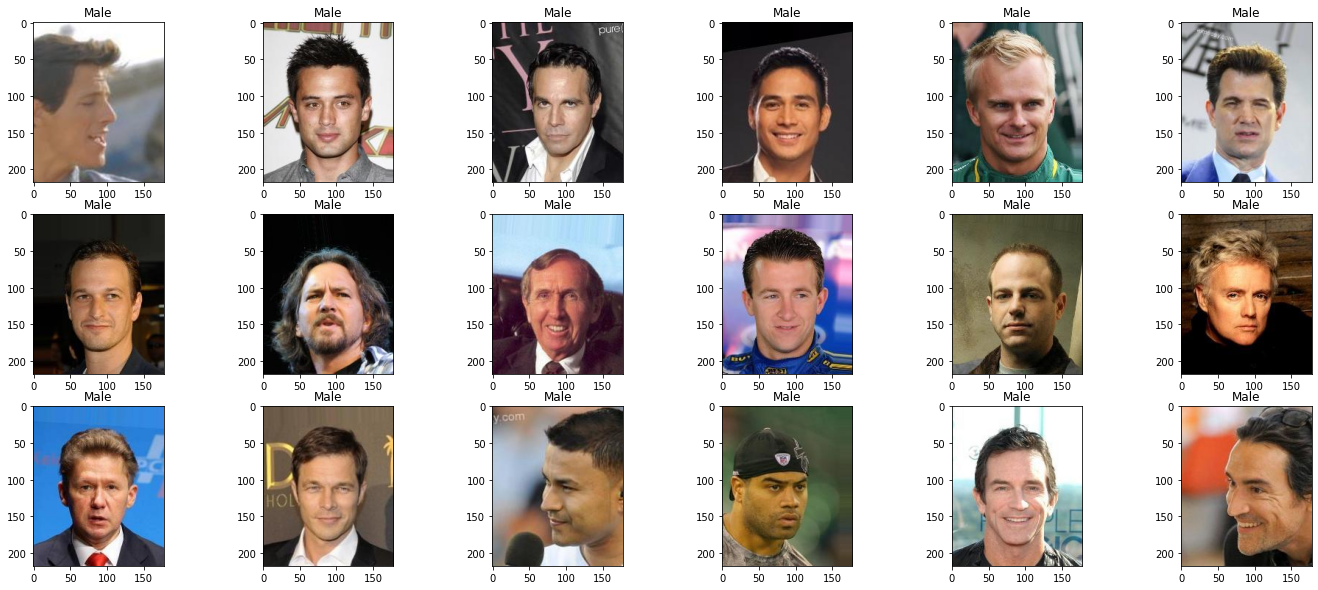

In [31]:
sample_visualization(male_sample)

Based on two gender types image visualization, we can say that the photo typical from overall is closed up, and there is some photos that taken from side angle.

---
# **5. Data Preprocessing**

## Inference Data

In [32]:
data_inf = data.sample(10, random_state=20)
data_inf

images   label
3862    /content/celeb_dataset/img_align_celeba/img_al...  female
162032  /content/celeb_dataset/img_align_celeba/img_al...  female
151052  /content/celeb_dataset/img_align_celeba/img_al...  female
105647  /content/celeb_dataset/img_align_celeba/img_al...    male
131937  /content/celeb_dataset/img_align_celeba/img_al...    male
123258  /content/celeb_dataset/img_align_celeba/img_al...  female
105589  /content/celeb_dataset/img_align_celeba/img_al...    male
69581   /content/celeb_dataset/img_align_celeba/img_al...    male
106825  /content/celeb_dataset/img_align_celeba/img_al...  female
138418  /content/celeb_dataset/img_align_celeba/img_al...  female

In [33]:
# Remove Inference Set
data_for_train_test = data.drop(data_inf.index)
data_for_train_test.head()

images   label
0  /content/celeb_dataset/img_align_celeba/img_al...  female
1  /content/celeb_dataset/img_align_celeba/img_al...  female
2  /content/celeb_dataset/img_align_celeba/img_al...    male
3  /content/celeb_dataset/img_align_celeba/img_al...  female
4  /content/celeb_dataset/img_align_celeba/img_al...  female

In [34]:
data_for_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Splitting Dataset

In [35]:
data_train, data_val = train_test_split(data, test_size=0.2, random_state=25)
data_train, data_test = train_test_split(data_train, test_size=0.1, random_state=25)

print("Train size :", data_train.shape)
print("Val size :", data_val.shape)
print("Test size :", data_test.shape)

Train size : (145871, 2)
Val size : (40520, 2)
Test size : (16208, 2)


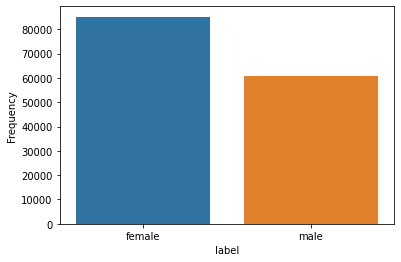

In [36]:
visualize_barplot(data_train,"label")

The distribution off male and female is quite good in train data, i hope this data can produce good deeplearning model.

due to the processing longer modelling time, i will limit every dataset row :
- train = 15000
- val = 5000
- test = 5000 

In [37]:
data_train = data_train.iloc[0:15000]
data_val = data_val.iloc[0:5000]
data_test = data_test.iloc[0:5000]

In [38]:
data_train.reset_index(drop=True, inplace=True)
data_val.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [39]:
print("Train size :", data_train.shape)
print("Val size :", data_val.shape)
print("Test size :", data_test.shape)

Train size : (15000, 2)
Val size : (5000, 2)
Test size : (5000, 2)


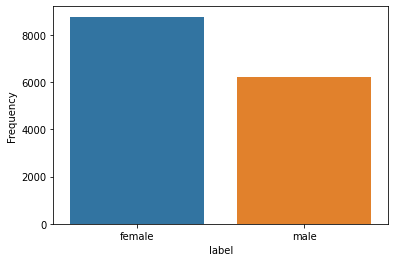

In [40]:
visualize_barplot(data_train,"label")

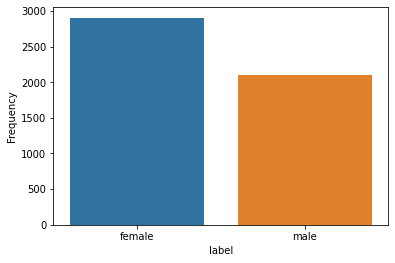

In [41]:
visualize_barplot(data_val,"label")

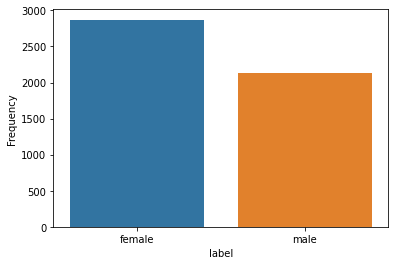

In [42]:
visualize_barplot(data_test,"label")

## Data Augmentation

In [43]:
train_datagenerator= ImageDataGenerator(
    rescale= 1./255,
    rotation_range= 0.1,
    width_shift_range= 0.1,
    shear_range= 0.1,
    zoom_range= 0.1,
    horizontal_flip= True
)

val_datagenerator= ImageDataGenerator(rescale= 1./255)

test_datagenerator = ImageDataGenerator(rescale= 1./255)

the purpose of script above is for doing the image data augmentation, the reason is to produce image with non-ideal condition to make sure the model in robust condition. 

In [44]:
img_height= 200
img_width= 200
SEED= 2
BATCH= 50
class_of_label = "categorical"

In [45]:
daug_train = train_datagenerator.flow_from_dataframe(
    dataframe= data_train,
    x_col= 'images',
    y_col= 'label',
    target_size= (img_height,img_width),
    class_mode= class_of_label,
    batch_size= BATCH,
    shuffle= True,
    seed= SEED
)

daug_val = val_datagenerator.flow_from_dataframe(
    dataframe= data_val,
    x_col= 'images',
    y_col= 'label',
    target_size= (img_height,img_width),
    class_mode= class_of_label,
    batch_size= BATCH,
    shuffle= False,
    seed= SEED
)

daug_test = test_datagenerator.flow_from_dataframe(
    dataframe= data_test,
    x_col= 'images',
    y_col= 'label',
    target_size= (img_height,img_width),
    class_mode= class_of_label,
    batch_size= BATCH,
    shuffle= False,
    seed= SEED
)

Found 15000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [46]:
daug_train.class_indices

{'female': 0, 'male': 1}

In [47]:
daug_val.class_indices

{'female': 0, 'male': 1}

In [48]:
daug_test.class_indices

{'female': 0, 'male': 1}

Ok, the image was completely augmented, let's try to visualize it.

In [49]:
def augmented_images_plot(img_aug):
    fig, axes = plt.subplots(1, 5, figsize=(20,10))
    axes = axes.flatten()
    for img, ax in zip(img_aug, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [50]:
aug_1 = [daug_train[0][0][0] for i in range (5)]

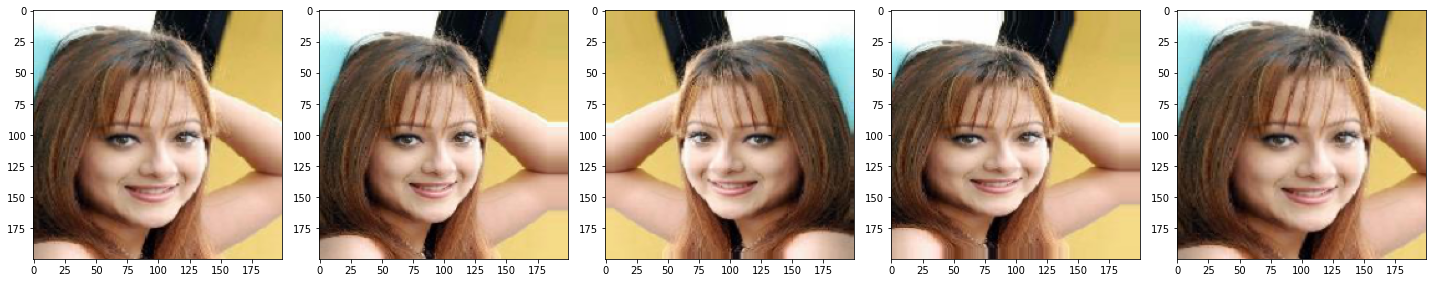

In [51]:
augmented_images_plot(aug_1)

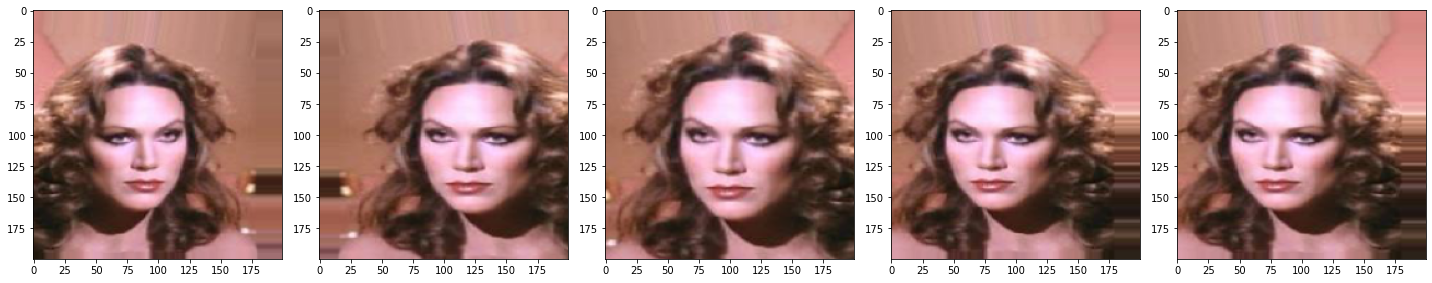

In [52]:
aug_2 = [daug_train[1][0][0] for i in range (5)]
augmented_images_plot(aug_2)

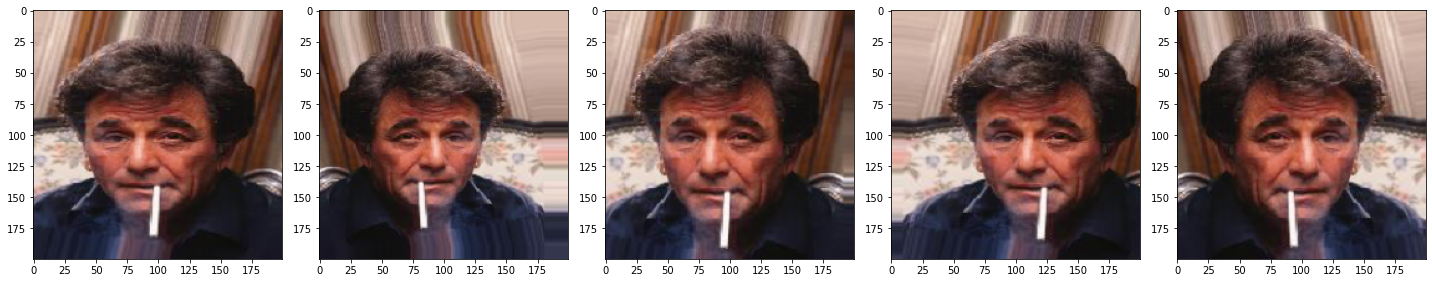

In [53]:
aug_3 = [daug_train[2][0][0] for i in range (5)]
augmented_images_plot(aug_3)

Based on the image above, we can see that the data augmentation was successfull, the image becomes to horizontal flipped, sheared, etc

---
# **6. Modelling and Evaluation**

## Define the callback

In [54]:
checkpoint_pretrained = ModelCheckpoint(filepath='model_pretrained1.h5', 
                               verbose=1, save_best_only=True)
checkpoint_seq_1 = ModelCheckpoint(filepath='model_seq1.h5', 
                               verbose=1, save_best_only=True)

## Using Pre-trained model (MobileNetV2)

In [55]:
img_shape = (img_width, img_height, 3)
initial_epochs = 10

In [56]:
pretrained_model1 = tf.keras.applications.InceptionV3(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [57]:
conv_layer = Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= img_shape)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
hiddenlayer1 = tf.keras.layers.Dense(256, activation='relu')
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')

In [58]:
inputs = tf.keras.Input(shape=(img_width, img_height, 3))
x = pretrained_model1(inputs)
x = conv_layer(x)
x = global_average_layer(x)
x = hiddenlayer1(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model_pretrained1 = tf.keras.Model(inputs, outputs)

In [59]:
model_pretrained1.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
model_pretrained1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 conv2d_94 (Conv2D)          (None, 2, 2, 16)          294928    
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               4352      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

In [61]:
history_pre1 = model_pretrained1.fit(daug_train,
                    epochs=initial_epochs,
                    callbacks=[checkpoint_pretrained],
                    validation_data=daug_val)

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 0.1867 - accuracy: 0.9244
Epoch 1: val_loss improved from inf to 0.14562, saving model to model_pretrained1.h5
300/300 [==============================] - 199s 602ms/step - loss: 0.1867 - accuracy: 0.9244 - val_loss: 0.1456 - val_accuracy: 0.9638
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 0.0914 - accuracy: 0.9664
Epoch 2: val_loss did not improve from 0.14562
300/300 [==============================] - 171s 569ms/step - loss: 0.0914 - accuracy: 0.9664 - val_loss: 0.2002 - val_accuracy: 0.9482
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 0.0783 - accuracy: 0.9707
Epoch 3: val_loss did not improve from 0.14562
300/300 [==============================] - 168s 559ms/step - loss: 0.0783 - accuracy: 0.9707 - val_loss: 0.1604 - val_accuracy: 0.9468
Epoch 4/10
300/300 [==============================] - ETA: 0s - loss: 0.0735 - accuracy: 0.9728
Epoch 4: val_loss improved from 

In [62]:
def plot_acc_val_loss (hist) :
  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']

  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Train_Accuracy')
  plt.plot(val_acc, label='Val_Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Train_Loss')
  plt.plot(val_loss, label='Val_Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Binary Crossentropy')
  plt.ylim([0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

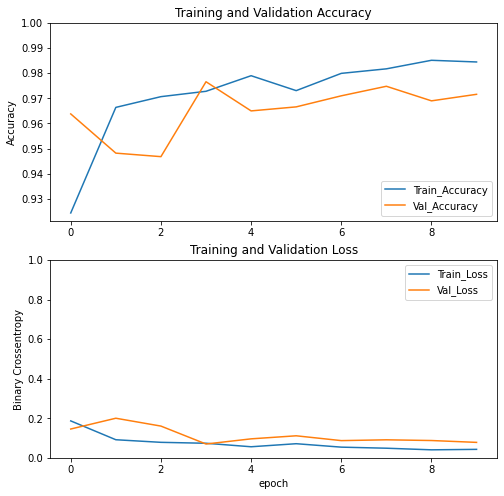

In [63]:
plot_acc_val_loss (history_pre1)

based on graphic above, we can see that the model picked at epoch 4, the model is slightly overfit on accuracy.

Because of that, i will try to build my own model using sequential API, and compared it with this pretrained model.

## Sequential API

### 3 Hidden Layer

In [64]:
model_seq_1= Sequential()
model_seq_1.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= img_shape))
model_seq_1.add(MaxPooling2D(pool_size=2, strides=2))

model_seq_1.add(Conv2D(filters=32, kernel_size=3, activation= 'relu', input_shape= img_shape))
model_seq_1.add(MaxPooling2D(pool_size=2, strides=2))

model_seq_1.add(Flatten())
model_seq_1.add(Dense(units=64, activation= 'relu'))

model_seq_1.add(Dense(units=2, activation='softmax'))

model_seq_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_seq_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                4

In [65]:
my_epoch = 10

In [66]:
history_seq_1 = model_seq_1.fit(daug_train,
                    epochs=my_epoch,
                    callbacks=[checkpoint_seq_1],
                    validation_data=daug_val)

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.7517
Epoch 1: val_loss improved from inf to 0.31709, saving model to model_seq1.h5
300/300 [==============================] - 133s 442ms/step - loss: 0.5336 - accuracy: 0.7517 - val_loss: 0.3171 - val_accuracy: 0.8670
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 0.2976 - accuracy: 0.8755
Epoch 2: val_loss improved from 0.31709 to 0.22746, saving model to model_seq1.h5
300/300 [==============================] - 134s 445ms/step - loss: 0.2976 - accuracy: 0.8755 - val_loss: 0.2275 - val_accuracy: 0.9078
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 0.2363 - accuracy: 0.9027
Epoch 3: val_loss improved from 0.22746 to 0.20945, saving model to model_seq1.h5
300/300 [==============================] - 133s 443ms/step - loss: 0.2363 - accuracy: 0.9027 - val_loss: 0.2094 - val_accuracy: 0.9182
Epoch 4/10
300/300 [==============================] - ETA: 0s - l

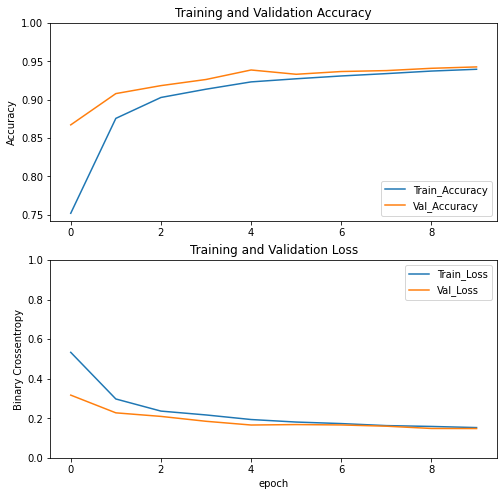

In [67]:
plot_acc_val_loss (history_seq_1)

Based on graph above, the model picked at epoch 10 with goodfitting between training and validation loss.

### 4 Hidden Layer

In [68]:
model_seq_2= Sequential()
model_seq_2.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= img_shape))
model_seq_2.add(MaxPooling2D(pool_size=2, strides=2))

model_seq_2.add(Conv2D(filters=32, kernel_size=3, activation= 'relu', input_shape= img_shape))
model_seq_2.add(MaxPooling2D(pool_size=2, strides=2))

model_seq_2.add(Conv2D(filters=64, kernel_size=3, activation= 'relu', input_shape= img_shape))
model_seq_2.add(MaxPooling2D(pool_size=2, strides=2))

model_seq_2.add(Flatten())
model_seq_2.add(Dense(units=128, activation= 'relu'))

model_seq_2.add(Dense(units=2, activation='softmax'))

model_seq_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_seq_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_98 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)      

In [69]:
checkpoint_seq_2 = ModelCheckpoint(filepath='model_seq2.h5', 
                               verbose=1, save_best_only=True)

In [70]:
history_seq_2 = model_seq_2.fit(daug_train,
                    epochs=my_epoch,
                    callbacks=[checkpoint_seq_2],
                    validation_data=daug_val)

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 0.5041 - accuracy: 0.7451
Epoch 1: val_loss improved from inf to 0.32830, saving model to model_seq2.h5
300/300 [==============================] - 133s 442ms/step - loss: 0.5041 - accuracy: 0.7451 - val_loss: 0.3283 - val_accuracy: 0.8588
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 0.2863 - accuracy: 0.8807
Epoch 2: val_loss improved from 0.32830 to 0.17831, saving model to model_seq2.h5
300/300 [==============================] - 134s 446ms/step - loss: 0.2863 - accuracy: 0.8807 - val_loss: 0.1783 - val_accuracy: 0.9306
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 0.2042 - accuracy: 0.9179
Epoch 3: val_loss improved from 0.17831 to 0.15488, saving model to model_seq2.h5
300/300 [==============================] - 133s 444ms/step - loss: 0.2042 - accuracy: 0.9179 - val_loss: 0.1549 - val_accuracy: 0.9380
Epoch 4/10
300/300 [==============================] - ETA: 0s - l

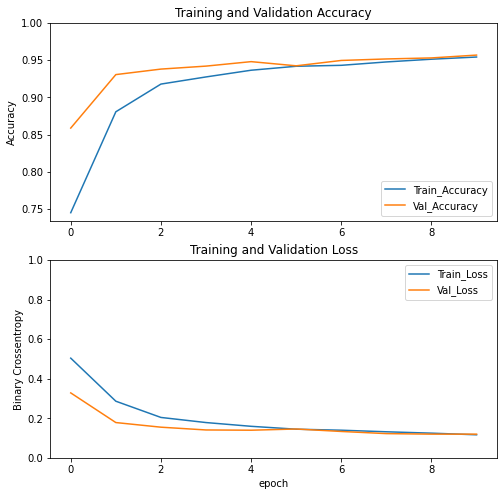

In [71]:
plot_acc_val_loss (history_seq_2)

Based on graph above, the model picked the best vall loss at epoch 10 with goodfitting between train and validation loss.

### Evaluation of the model

In [72]:
def evaluate_model_acc(mod) :
  vnames = [name for name in globals() if globals()[name] is mod]
  loss, accuracy = mod.evaluate(daug_test, verbose=False)
  print("Testing Accuracy", vnames, "adalah :  {:.4f}".format(accuracy))


In [73]:
evaluate_model_acc(model_pretrained1)

Testing Accuracy ['model_pretrained1'] adalah :  0.9718


In [74]:
evaluate_model_acc(model_seq_1)

Testing Accuracy ['model_seq_1'] adalah :  0.9404


In [75]:
evaluate_model_acc(model_seq_2)

Testing Accuracy ['model_seq_2'] adalah :  0.9562


based on the train and val loss and accuracy, the model_seq_1 with 3 hidden layer gives more stable loss and accuracy, because of that i'll try to improve model_seq_1 with change the optimizer.

---
# **7. Model Improvement and Evaluation**

## Change optimizer to Adamax

In [76]:
model_seq_adamax= Sequential()
model_seq_adamax.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= img_shape))
model_seq_adamax.add(MaxPooling2D(pool_size=2, strides=2))

model_seq_adamax.add(Conv2D(filters=32, kernel_size=3, activation= 'relu', input_shape= img_shape))
model_seq_adamax.add(MaxPooling2D(pool_size=2, strides=2))

model_seq_adamax.add(Flatten())
model_seq_adamax.add(Dense(units=64, activation= 'relu'))

model_seq_adamax.add(Dense(units=2, activation='softmax'))

model_seq_adamax.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_seq_adamax.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_101 (Conv2D)         (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [77]:
checkpoint_adamax = ModelCheckpoint(filepath='model_adamax.h5', 
                               verbose=1, save_best_only=True)

In [78]:
history_imp_adamax = model_seq_adamax.fit(daug_train,
                    epochs=my_epoch,
                    callbacks=[checkpoint_adamax],
                    validation_data=daug_val)

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.7714
Epoch 1: val_loss improved from inf to 0.38374, saving model to model_adamax.h5
300/300 [==============================] - 133s 442ms/step - loss: 0.5260 - accuracy: 0.7714 - val_loss: 0.3837 - val_accuracy: 0.8386
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 0.3669 - accuracy: 0.8525
Epoch 2: val_loss improved from 0.38374 to 0.29793, saving model to model_adamax.h5
300/300 [==============================] - 134s 446ms/step - loss: 0.3669 - accuracy: 0.8525 - val_loss: 0.2979 - val_accuracy: 0.8798
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 0.2886 - accuracy: 0.8865
Epoch 3: val_loss improved from 0.29793 to 0.21940, saving model to model_adamax.h5
300/300 [==============================] - 133s 444ms/step - loss: 0.2886 - accuracy: 0.8865 - val_loss: 0.2194 - val_accuracy: 0.9134
Epoch 4/10
300/300 [==============================] - ETA: 

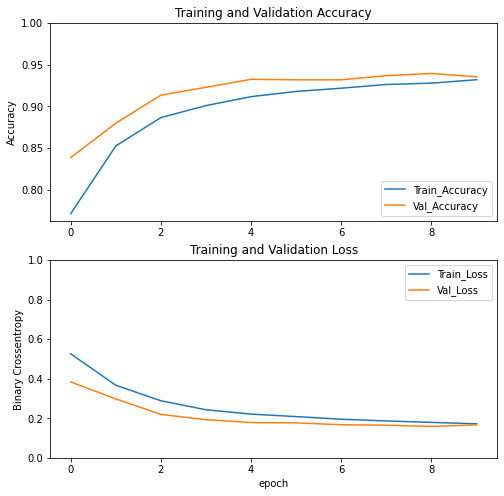

In [79]:
plot_acc_val_loss (history_imp_adamax)

Based on graph above, we can see that the model sligthly underfitting, train accuracy and loss are higher than training accuracy and loss.

## Change optimizer to Nadam

In [80]:
model_seq_nadam= Sequential()
model_seq_nadam.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= img_shape))
model_seq_nadam.add(MaxPooling2D(pool_size=2, strides=2))

model_seq_nadam.add(Conv2D(filters=32, kernel_size=3, activation= 'relu', input_shape= img_shape))
model_seq_nadam.add(MaxPooling2D(pool_size=2, strides=2))

model_seq_nadam.add(Flatten())
model_seq_nadam.add(Dense(units=64, activation= 'relu'))

model_seq_nadam.add(Dense(units=2, activation='softmax'))

model_seq_nadam.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_seq_nadam.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 73728)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [81]:
checkpoint_nadam = ModelCheckpoint(filepath='model_nadam.h5', 
                               verbose=1, save_best_only=True)

In [82]:
history_imp_nadam = model_seq_nadam.fit(daug_train,
                    epochs=my_epoch,
                    callbacks=[checkpoint_nadam],
                    validation_data=daug_val)

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 0.4839 - accuracy: 0.7784
Epoch 1: val_loss improved from inf to 0.32212, saving model to model_nadam.h5
300/300 [==============================] - 135s 446ms/step - loss: 0.4839 - accuracy: 0.7784 - val_loss: 0.3221 - val_accuracy: 0.8626
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 0.2559 - accuracy: 0.8954
Epoch 2: val_loss improved from 0.32212 to 0.19774, saving model to model_nadam.h5
300/300 [==============================] - 133s 444ms/step - loss: 0.2559 - accuracy: 0.8954 - val_loss: 0.1977 - val_accuracy: 0.9170
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 0.2062 - accuracy: 0.9165
Epoch 3: val_loss improved from 0.19774 to 0.18420, saving model to model_nadam.h5
300/300 [==============================] - 133s 443ms/step - loss: 0.2062 - accuracy: 0.9165 - val_loss: 0.1842 - val_accuracy: 0.9270
Epoch 4/10
300/300 [==============================] - ETA: 0s 

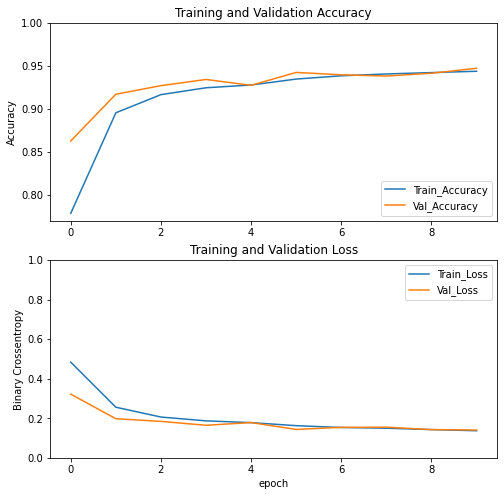

In [83]:
plot_acc_val_loss (history_imp_nadam)

## Evaluation (Comparing Improved Model with Pre trained Model)

In [84]:
evaluate_model_acc(model_pretrained1)

Testing Accuracy ['model_pretrained1'] adalah :  0.9718


In [85]:
evaluate_model_acc(model_seq_1)

Testing Accuracy ['model_seq_1'] adalah :  0.9404


In [86]:
evaluate_model_acc(model_seq_2)

Testing Accuracy ['model_seq_2'] adalah :  0.9562


In [87]:
evaluate_model_acc(model_seq_adamax)

Testing Accuracy ['model_seq_adamax'] adalah :  0.9366


In [88]:
evaluate_model_acc(model_seq_nadam)

Testing Accuracy ['model_seq_nadam'] adalah :  0.9458


Based on the accuracy evaluation above we can see that model with 3 hidden layer can be improved with changing on the optimizer, but the best result are produced using nadam optimizer with 0.9486.

But the best models are still model pretrained with testing accuracy score = 0.9594

# 8. Model Savings

in this steps, i will save just for the best model based on model evaluation before ()

In [89]:
model_seq_nadam.save('best_model_seq_cnn.h5')
model_pretrained1.save('model_inceptionV3.h5')

# 9. Best Model Evaluation on Classification Report and Confusion Matrix

In [90]:
# Predict Function With 2 Output Nodes
def predict_augmented_dataset(augmented_test,model_nn):
  yyy = model_nn.predict(augmented_test)
  y_pred_best = []
  for i in range(len(yyy)) :
    prediction = np.argmax(yyy[i])
    if prediction == 0 :
      y_pred_best.append("female")
    else :
      y_pred_best.append("male")
  return (y_pred_best)

In [91]:
y_pred=predict_augmented_dataset(daug_test,model_pretrained1)

In [92]:
# Classification and Confusion Matrix Function

def classification_and_confusion (predicted_y,real_y):
  print(classification_report(real_y, predicted_y))
  a = confusion_matrix(real_y, predicted_y)
  sns.heatmap(a, annot=True, fmt=".1f")
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()
  

              precision    recall  f1-score   support

      female       0.97      0.99      0.98      2871
        male       0.98      0.95      0.97      2129

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



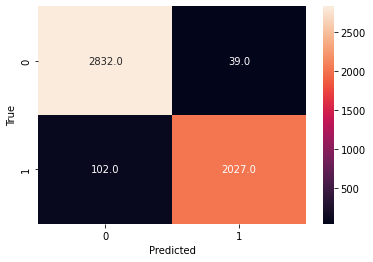

In [93]:
classification_and_confusion (y_pred,data_test['label'])

Based on classification report, the pretrained model has goodfit on both female (0) and male (1) category with similar precision, recall, and f1-score. 

at confusion matrix, the false positive is bigger than false negative, but this model still categorized as a good model with minimum miss prediction. 

In [94]:
y_pred2=predict_augmented_dataset(daug_test,model_seq_nadam)

              precision    recall  f1-score   support

      female       0.95      0.95      0.95      2871
        male       0.94      0.93      0.94      2129

    accuracy                           0.95      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.95      0.95      0.95      5000



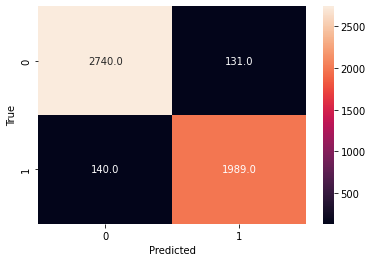

In [95]:
classification_and_confusion (y_pred2,data_test['label'])

Based on the classification report, the nadam model has a goodfit result but the pretrained model has slightly better accuracy with 0.01 difference, so this model is pretty good too.

At confusion matrix, the miss predicted data (false positive and false negative) is just around 5% of all true predicted data, because of this, every score at this models are high.

# 10. Model Inference

In [96]:
data_inf

images   label
0  /content/celeb_dataset/img_align_celeba/img_al...  female
1  /content/celeb_dataset/img_align_celeba/img_al...  female
2  /content/celeb_dataset/img_align_celeba/img_al...  female
3  /content/celeb_dataset/img_align_celeba/img_al...    male
4  /content/celeb_dataset/img_align_celeba/img_al...    male
5  /content/celeb_dataset/img_align_celeba/img_al...  female
6  /content/celeb_dataset/img_align_celeba/img_al...    male
7  /content/celeb_dataset/img_align_celeba/img_al...    male
8  /content/celeb_dataset/img_align_celeba/img_al...  female
9  /content/celeb_dataset/img_align_celeba/img_al...  female

In [97]:
inf_datagenerator= ImageDataGenerator(rescale= 1./255)
daug_inf1 = inf_datagenerator.flow_from_dataframe(
    dataframe= data_inf,
    x_col= 'images',
    y_col= 'label',
    target_size= (img_height,img_width),
    class_mode= class_of_label
    # batch_size= BATCH,
    # # shuffle= True,
    # seed= SEED
)

Found 10 validated image filenames belonging to 2 classes.


In [98]:
predict_augmented_dataset(daug_inf1,model_pretrained1)

['male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'female']

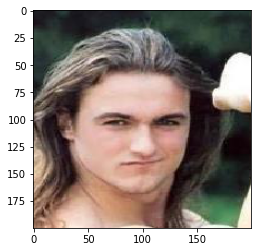

In [99]:
plt.imshow(daug_inf1[0][0][3])

In [100]:
np.shape(daug_inf1[0][0][0:1])

(1, 200, 200, 3)

In [101]:
# Predict Function With 2 Output Nodes from inference img satuan
def predict_inference_satuan (inf_img,daug,nn_model) :
  y_pred_inf = []
  # inf_img = load_img(daug_inf, target_size=shape_of_image)
  plt.imshow(inf_img)
  result = nn_model.predict(daug)
  res = np.argmax(result)
  if res == 0 :
    y_pred_inf.append("female")
    print("yes, she is : female")
  else :
    y_pred_inf.append("male")
    print("yes, he is : male")
  plt.title(y_pred_inf)
  
  plt.show()

yes, she is : female


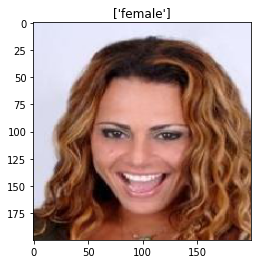

In [102]:
predict_inference_satuan (inf_img=daug_inf1[0][0][0],daug=daug_inf1[0][0][0:1],nn_model=model_pretrained1)

yes, she is : female


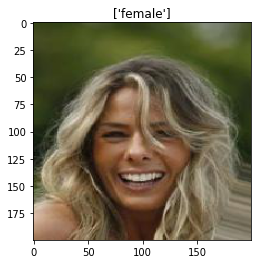

In [103]:
predict_inference_satuan (inf_img=daug_inf1[0][0][4],daug=daug_inf1[0][0][4:5],nn_model=model_pretrained1)

yes, she is : female


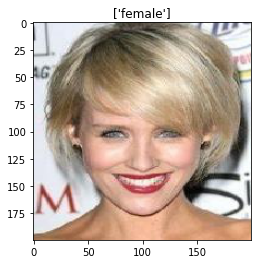

In [104]:
predict_inference_satuan (inf_img=daug_inf1[0][0][5],daug=daug_inf1[0][0][5:6],nn_model=model_pretrained1)

Based on the model inference above, the model was success to predict every inference data.

# 11. Conclusion

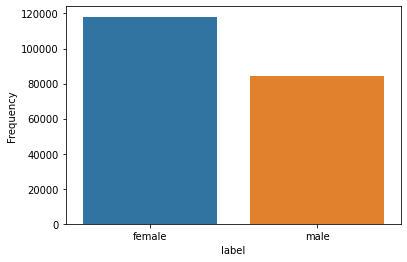

In [105]:
visualize_barplot(data,"label")

- Based on all datasets, the female gender having bigger propotion of data than male gender. Due to my low computer specification, i limit the data with 15000 train set, 5000 val set, and 5000 test set.

- In this modeling, I use an image data generator to augment data according to the desired constraints such as only horizontal flips, image shifts, and so on. This technique is used to ensure that the resulting model is more robust.

- Based on the modelling evaluation, the model that having best performance was model pre-trained using inceptionV3, the evaluation will be explained below:

              precision    recall  f1-score   support

      female       0.97      0.99      0.98      2871
        male       0.98      0.95      0.97      2129

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



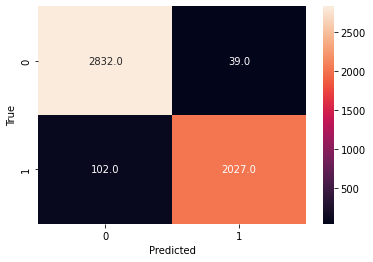

In [106]:
classification_and_confusion (y_pred,data_test['label'])

- Based on classification report above, the pretrained model has goodfit on both female (0) and male (1) category with similar precision, recall, and f1-score. 

- at confusion matrix, the false positive is bigger than false negative, but this model still categorized as a good model with minimum miss prediction. 

- according to what I did in preprocessing, the possibility of wrong predictions in this model can occur if the input image is in an inverted vertical position, and there may be photos of women who have short hair like men.

In [107]:
model_pretrained1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 conv2d_94 (Conv2D)          (None, 2, 2, 16)          294928    
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               4352      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

Model InceptionV3 is a very deep layer model that have been improved from InceptionV1 and InceptionV2, based on research of (Wang,2019) this model will have a good performance to do object recognition and success to perform pulmonary image classification.

The major modifications done on the Inception V3 model are

- Factorization into Smaller Convolutions
- Spatial Factorization into Asymmetric Convolutions
- Utility of Auxiliary Classifiers
- Efficient Grid Size Reduction

Reference :

Wang, Cheng & Chen, Delei & Lin, Hao & Liu, B. & Zeng, C. & Chen, D. & Zhang, Guokai. (2019). Pulmonary Image Classification Based on Inception-v3 Transfer Learning Model. IEEE Access. PP. 1-1. 10.1109/ACCESS.2019.2946000. 